In [336]:
#import libs
import matplotlib.pyplot as plt

import plotly as py
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

Define the Problem ...

Task of competition is to predict using ML whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

Training data has been provided in the file train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

Testing data has been provided in the file test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. 

Your task is to predict the value of Transported for the passengers in this set.

Define the type of Problem ...

Given that we need to predict the total value of passengers transported, the output will be a category or label (i.e. transported (True) or not transported (False). Therefore, this is a classification type of problem to solve. 

Next steps ...
1.Binary classification, as there are only two possible outcomes, True or False
2.Are there any relationships between variables? Is there a decision boundary that seperates different classes? 
3.Evaluation metrics for classification include:- 
-accuracy
-precision
-recall
-F1-score 


In [337]:
#Gather and prepare training data (data is already split between training and test data)

file_path = r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\ML_titanic\train.csv"
train_data = pd.read_csv(file_path)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [338]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [339]:
train_data.shape

(8693, 14)

In [340]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The max. figures for Room Service, Food Court, Shopping Mall, Spa and VR Deck are all total amounts of money spent in these areas and are in the thousands. Whereas, the max. age is 79 and that seems reasonable.


In [341]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [342]:
#Clean and pre-process data 
#check and handle missing values, outliers etc. 

print('missing values (%) per column: \n', 100*train_data.isnull().mean())

missing values (%) per column: 
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [343]:
#overall percentage of missing values 
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)
print('Overall percentage of missing values in dataset: ', percent_missing_vals,'%')


Overall percentage of missing values in dataset:  1.91 %


There is a small percentage of missing values in 12 out of 14 of the columns. The only columns without missing data are PassengerId and Transported.

For the numerical columns we could impute the mean value:-
1.Age
2.RoomService
3.FoodCourt
4.ShoppingMall
5.Spa
6.VRDeck


In [344]:
#Let's fill the missing numerical values with mean values

mean_age=train_data['Age'].mean()
mean_RS=train_data['RoomService'].mean()
mean_FC=train_data['FoodCourt'].mean()
mean_SM=train_data['ShoppingMall'].mean()
mean_Spa=train_data['Spa'].mean()
mean_VRDeck=train_data['VRDeck'].mean()


train_data['Age'].fillna(mean_age, inplace=True)
train_data['RoomService'].fillna(mean_RS, inplace=True)
train_data['FoodCourt'].fillna(mean_FC, inplace=True)
train_data['ShoppingMall'].fillna(mean_SM, inplace=True)
train_data['Spa'].fillna(mean_Spa, inplace=True)
train_data['VRDeck'].fillna(mean_VRDeck, inplace=True)

In [345]:
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
updated_percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)


print('Percentage of missing values following mean value update',updated_percent_missing_vals , '%')

Percentage of missing values following mean value update 0.99 %


Now we are down to less than 1% of missing values in the remaining columns! Let's take a look at the category columns:-

1.HomePlanet
2.CryoSleep
3.Cabin
4.Destination
5.VIP
6.Name 



In [346]:
#how many values are missing in the category columns?

missing_hp_val=train_data['HomePlanet'].isnull().sum()
missing_cs_val=train_data['CryoSleep'].isnull().sum()
missing_cab_val=train_data['Cabin'].isnull().sum()
missing_dest_val=train_data['Destination'].isnull().sum()
missing_vip_val=train_data['VIP'].isnull().sum()
missing_name_val=train_data['Name'].isnull().sum()

print('Missing Home Planet Values:', missing_hp_val)
print('Missing CryoSleep Values:', missing_cs_val)
print('Missing Cabin Values:', missing_cab_val)
print('Missing Destination Values:', missing_dest_val)
print('Missing VIP Values:', missing_vip_val)
print('Missing Name Values:', missing_name_val)



Missing Home Planet Values: 201
Missing CryoSleep Values: 217
Missing Cabin Values: 199
Missing Destination Values: 182
Missing VIP Values: 203
Missing Name Values: 200


The missing values in the category column seem to hover around the 200-mark. I think it would be sensible to drop the rows where the Name values are missing. 


In [347]:
train_data.dropna(subset=['Name'], inplace=True)
train_data.shape

(8493, 14)

In [348]:
#Let's review the missing values 

updated_missing_hp_val=train_data['HomePlanet'].isnull().sum()
updated_missing_cs_val=train_data['CryoSleep'].isnull().sum()
updated_missing_cab_val=train_data['Cabin'].isnull().sum()
updated_missing_dest_val=train_data['Destination'].isnull().sum()
updated_missing_vip_val=train_data['VIP'].isnull().sum()
updated_missing_name_val=train_data['Name'].isnull().sum()

print('Missing Home Planet Values:', updated_missing_hp_val)
print('Missing CryoSleep Values:', updated_missing_cs_val)
print('Missing Cabin Values:', updated_missing_cab_val)
print('Missing Destination Values:', updated_missing_dest_val)
print('Missing VIP Values:', updated_missing_vip_val)
print('Missing Name Values:', updated_missing_name_val)

Missing Home Planet Values: 194
Missing CryoSleep Values: 207
Missing Cabin Values: 197
Missing Destination Values: 178
Missing VIP Values: 202
Missing Name Values: 0


There doesn't seem to be a relationship between the missing names and other category columns as there is a still approx. 200 rows missing in the other columns. 


In [349]:
#mode method returns the most frequently occurring value and iloc[o] returns the first from a series
mode_hp=train_data['HomePlanet'].mode().iloc[0]
mode_cs=train_data['CryoSleep'].mode().iloc[0]
mode_cab=train_data['Cabin'].mode().iloc[0]
mode_dest=train_data['Destination'].mode().iloc[0]
mode_vip=train_data['VIP'].mode().iloc[0]


print('Mode Home Planet Value:', mode_hp)
print('Mode CryoSleep Value:', mode_cs)
print('Mode Cabin Value:', mode_cab)
print('Mode Destination Value:', mode_dest)
print('Mode VIP Value:', mode_vip)



Mode Home Planet Value: Earth
Mode CryoSleep Value: False
Mode Cabin Value: G/734/S
Mode Destination Value: TRAPPIST-1e
Mode VIP Value: False


In [350]:
#Let's first fill the home planet values and destination values with the mode
train_data['HomePlanet'].fillna(mode_hp, inplace=True)
train_data['Destination'].fillna(mode_dest, inplace=True)


In [351]:
train_data.shape

(8493, 14)

In [352]:
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
second_updated_percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)

print('Percentage of missing values following mode update',second_updated_percent_missing_vals , '%')

Percentage of missing values following mode update 0.51 %


Now the percent of missing values is around half a percent, I think it would be reasonable to drop the rows with missing values in the CryopSleep column and Cabin Value column as it would be difficult to carry out accurate imputation in these columns. 

In [353]:
#drop missing rows in cryosleep, vip and cabin columns

train_data.dropna(subset=['CryoSleep', 'Cabin', 'VIP'], inplace=True)

train_data.shape

(7907, 14)

In [354]:
print('missing values (%) per column: \n', 100*train_data.isnull().mean())

missing values (%) per column: 
 PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64


Now the missing values have been dealt with, we can move on to the next step. 

To identify any correlations between columns, it could be useful to map category columns data values to integers and take a deeper dive into the dataset. 

The cabin column provides information on the deck/number/side (i.e. Port or Starboard). 


In [355]:
#Let's split the cabin column into three separate columns for deck, number and side.

train_data[['Cabin Deck', 'Cabin Number', 'Cabin Side']] = train_data['Cabin'].str.split('/', expand=True)


In [356]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Number,Cabin Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [357]:
#let's take a closer look at cryo sleep and transported stats 

fig = px.histogram(train_data, x='CryoSleep', title = "CryoSleep Request Histogram", color= train_data['Transported'])
fig.show()

In [358]:
#let's take a closer look at home planet and transported stats 

fig = px.histogram(train_data, x='HomePlanet', title = "Home Planet Histogram", color= train_data['Transported'])
fig.show()

In [359]:
#let's take a closer look at cabin side and transported stats 

fig = px.histogram(train_data, x='Cabin Side', title = "Cabin Side (Port or Starboard) Histogram", color= train_data['Transported'])
fig.show()

In [360]:
#let's take a closer look at passenger age and transported stats 

fig = px.histogram(train_data, x='Age', title = "Passenger Age Histogram", color= train_data['Transported'])
fig.show()

In [361]:
#let's take a closer look at VIP and transported stats 

fig = px.histogram(train_data, x='VIP', title = "VIP Service Histogram", color= train_data['Transported'])
fig.show()

In [362]:
#let's take a closer look at Destination and transported stats 

fig = px.histogram(train_data, x='Destination', title = "Destination Histogram", color= train_data['Transported'])
fig.show()

From the graphs above, it is evident that the strongest correlation is between cryo sleep request and being transported. 

In [363]:
#map data in Home Planet and Destination columns 
mapping_dict1 = {'Earth':1, 'Europa':2, 'Mars':3}
train_data['HomePlanet'] = train_data['HomePlanet'].map(mapping_dict1)

mapping_dict2 = {'P':1, 'S':2}
train_data['Cabin Side'] = train_data['Cabin Side'].map(mapping_dict2)

mapping_dict3 = {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}
train_data['Destination'] = train_data['Destination'].map(mapping_dict3)

mapping_dict4 = {'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
train_data['Cabin Deck'] = train_data['Cabin Deck'].map(mapping_dict4)

In [364]:
train_data['Cabin Deck'].value_counts()

Cabin Deck
6    2592
7    2380
5     822
2     732
3     692
4     449
1     237
8       3
Name: count, dtype: int64

In [365]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Number,Cabin Side
0,0001_01,2,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2,0,1
1,0002_01,1,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,6,0,2
2,0003_01,2,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,2
3,0003_02,2,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,2
4,0004_01,1,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,6,1,2


In [366]:
reduced_train_data=train_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Cabin Number'])
reduced_train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Deck,Cabin Side
0,2,False,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2,1
1,1,False,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,6,2
2,2,False,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,2
3,2,False,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,2
4,1,False,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,False,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,1
8689,1,True,2,18.0,False,0.0,0.0,0.0,0.0,0.0,False,7,2
8690,1,False,1,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,7,2
8691,2,False,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,5,2


In [367]:
reduced_train_data.dtypes

HomePlanet        int64
CryoSleep        object
Destination       int64
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Cabin Deck        int64
Cabin Side        int64
dtype: object

In [368]:
reduced_train_data.describe(exclude='number')

,CryoSleep,VIP,Transported
count,7907,7907,7907
unique,2,2,2
top,False,False,True
freq,5089,7720,3979


In [369]:
reduced_train_data.corr().style.background_gradient(cmap='Oranges')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Deck,Cabin Side
HomePlanet,1.000000,0.085031,-0.034476,0.132658,0.127142,0.222462,0.071328,0.110859,0.055658,0.038981,0.114238,-0.415138,-0.001382
CryoSleep,0.085031,1.000000,0.097704,-0.076832,-0.079322,-0.256353,-0.207785,-0.226661,-0.200084,-0.199681,0.472114,0.016680,0.018821
Destination,-0.034476,0.097704,1.000000,0.006991,0.042067,-0.055259,0.111349,-0.020418,0.053611,0.071741,0.114105,-0.191754,0.008609
Age,0.132658,-0.076832,0.006991,1.000000,0.095399,0.071549,0.131690,0.040403,0.118535,0.097201,-0.075788,-0.243898,0.009372
VIP,0.127142,-0.079322,0.042067,0.095399,1.000000,0.037788,0.127309,0.017392,0.056236,0.125385,-0.038457,-0.184533,-0.012296
RoomService,0.222462,-0.256353,-0.055259,0.071549,0.037788,1.000000,-0.015079,0.060202,0.008601,-0.029001,-0.246722,-0.023450,-0.015244
FoodCourt,0.071328,-0.207785,0.111349,0.131690,0.127309,-0.015079,1.000000,-0.012845,0.212411,0.229226,0.048631,-0.321060,0.020661
ShoppingMall,0.110859,-0.226661,-0.020418,0.040403,0.017392,0.060202,-0.012845,1.000000,0.019349,-0.003649,0.010504,-0.030416,-0.017432
Spa,0.055658,-0.200084,0.053611,0.118535,0.056236,0.008601,0.212411,0.019349,1.000000,0.155988,-0.216046,-0.228205,0.003728
VRDeck,0.038981,-0.199681,0.071741,0.097201,0.125385,-0.029001,0.229226,-0.003649,0.155988,1.000000,-0.208292,-0.258187,-0.011676


The graph above confirms what the correlation table depicts. A high number of passengers who requested to be in cryo sleep were also transported.


r-values greater than 0.7 indicate a strong correlation between two attributes. From the graph above, there doesn't appear to be any strong correlations. However, there seems to be link between the passengers who requested to be in cryo sleep and passengers who were transported, with an r-value of 0.47 

Let's use random forest to find best feature selection.

In [404]:
train_data['Transported'].value_counts()

Transported
True     3979
False    3928
Name: count, dtype: int64

[ True False  True ... False  True  True]
Accuracy is:  0.7943531394858828


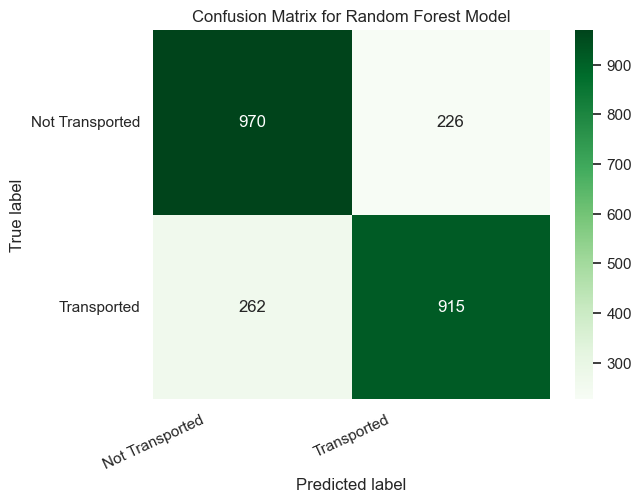

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

#define features and target variable
X = reduced_train_data.drop('Transported', axis=1)
y = reduced_train_data['Transported']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#instantiate and fit the Random Forest Classifier with n-estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train, y_train)

#make predictions for the test set
y_pred_test = clf_rf.predict(X_test)
print(y_pred_test)

#accuracy score
ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy is: ', ac)

#build a confusion matrix to check how many of the classifier's predictions were correct 
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens)

#add labels to plot
class_names=['Not Transported', 'Transported']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A confusion matrix is a table used in machine learning and statistics to assess the performance of a classification model. It summarizes the results of classification by showing the counts of true positive, true negative, false positive, and false negative predictions. These values help evaluate a model’s accuracy, precision, recall, and F1-score, which are crucial metrics for understanding how well the model classifies data into different categories. 

Accuracy is 79% which is good, but not great. Let's check out some other feature selection methods ... 

In [383]:
#Univariate feature selection and random forest classification 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#find best score 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [388]:
selected_features_df = pd.DataFrame({'Feature: ': X_train.columns, 'Scores: ': select_feature.scores_.round(2)})
selected_features_df.sort_values(by='Scores: ', ascending=False)

,Feature:,Scores:
8,Spa,1078758.98
9,VRDeck,943423.91
5,RoomService,634185.65
6,FoodCourt,45557.66
7,ShoppingMall,1786.25
1,CryoSleep,802.46
3,Age,159.08
10,Cabin Deck,53.13
2,Destination,35.23
0,HomePlanet,24.72


The amenities on the Titanic appear to have a strong correlation with the outcome. Let's take a closer look at the top 5 features.  

In [397]:
#let's see the impact on accuracy if we use the k-best features

#define features and target variable
X = reduced_train_data.drop('Transported', axis=1)
y = reduced_train_data['Transported']

X_train2 = select_feature.transform(X_train)
X_test2 = select_feature.transform(X_test)

X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin Deck,Cabin Side
4655,3,False,1,32.0,False,1016.0,0.000000,307.0,5.0,304.854791,6,2
7307,1,True,1,22.0,False,0.0,0.000000,0.0,0.0,0.000000,7,1
4438,3,True,1,35.0,False,0.0,458.077203,0.0,0.0,0.000000,5,2
2745,1,True,3,39.0,False,0.0,0.000000,0.0,0.0,0.000000,7,1
1791,1,False,3,40.0,False,1465.0,39.000000,0.0,0.0,1225.000000,6,2


Accuracy is:  0.7846607669616519


<Axes: >

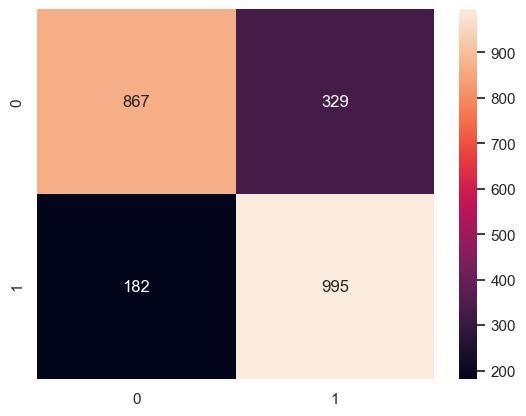

In [405]:
#random forest classifier with n-estimators=10 (default)
clf_rf2 = RandomForestClassifier()
clr_rf2 = clf_rf2.fit(X_train2, y_train)

ac2 = accuracy_score(y_test, clf_rf2.predict(X_test2))
print('Accuracy is: ', ac2)
cm2 = confusion_matrix(y_test, clf_rf2.predict(X_test2))
sns.heatmap(cm2, annot=True, fmt='d')

The accuracy score has gone down slightly to 78%. Perhaps, this indicates that other features impact the accuracy score. We already know that there is correlation between Cryo Sleep and the outcome, so we may need to add that feature back into the analysis. 


Now that feature selection is completed, let's start building a ML model ...
Steps include ... 

1.define - what type of model 
2.fit - find patterns from data provided
3.predict 
4.evaluate - determine accuracy of model using a metric


As this is a classification problem, let's consider using the Random Forest Classifier ML model.

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [417]:
reduced_train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Deck,Cabin Side
0,2,False,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2,1
1,1,False,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,6,2
2,2,False,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,2
3,2,False,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,2
4,1,False,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True,6,2


In [420]:
selected_features_train_data = reduced_train_data.drop(columns = ['HomePlanet', 'Destination', 'Age', 'VIP', 'Cabin Deck', 'Cabin Side'])
selected_features_train_data

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,109.0,9.0,25.0,549.0,44.0,True
2,False,43.0,3576.0,0.0,6715.0,49.0,False
3,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
8688,False,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,0.0,0.0,0.0,0.0,0.0,False
8690,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,0.0,1049.0,0.0,353.0,3235.0,False


In [421]:
#define features and target variable
X = selected_features_train_data.drop('Transported', axis=1)
y = selected_features_train_data['Transported']

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [424]:
len(X_train)

5534

In [425]:
len(X_test)

2373

In [452]:
#create ML model on trained data 
model = RandomForestClassifier()
tmodel = model.fit(X_train, y_train)

In [453]:
tmodel.score(X_test, y_test)

0.7842393594605984

In [446]:
#prediction 
y_predicted = tmodel.predict(X_test)

In [455]:
print(y_predicted)

[ True  True  True ... False  True  True]


In [447]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[875, 321],
       [189, 988]], dtype=int64)

Accuracy is:  0.7842393594605984


TypeError: 'str' object is not callable

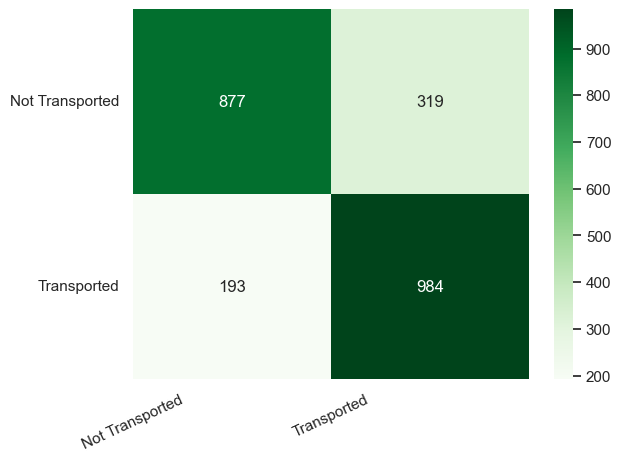

In [458]:
#accuracy score
ac = accuracy_score(y_test, tmodel.predict(X_test))
print('Accuracy is: ', ac)

#build a confusion matrix to check how many of the classifier's predictions were correct 
cm = confusion_matrix(y_test, tmodel.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens)

#add labels to plot
#class_names=['Not Transported', 'Transported']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [464]:
test_data_filepath = r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\ML_titanic\test.csv"
test_data = pd.read_csv(test_data_filepath)

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [465]:
passenger_ids = test_data['PassengerId']
test_data = test_data.drop(['Name', 'PassengerId', 'HomePlanet', 'Destination', 'Cabin', 'Age', 'VIP'], axis=1)

In [466]:
test_data.head()

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,True,0.0,0.0,0.0,0.0,0.0
1,False,0.0,9.0,0.0,2823.0,0.0
2,True,0.0,0.0,0.0,0.0,0.0
3,False,0.0,6652.0,0.0,181.0,585.0
4,False,10.0,0.0,635.0,0.0,0.0


In [467]:
test_predictions = tmodel.predict(test_data)
output_df = pd.DataFrame({'PassengerId' : passenger_ids, 'Transported' : test_predictions})
output_df['Transported'] = output_df['Transported'].astype(bool)

output_df.to_csv('titanic_output.csv', index=False)

In [468]:
output_df.head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False


In [469]:
output_df['Transported'].value_counts()

Transported
True     2387
False    1890
Name: count, dtype: int64

In [ ]:
test_data.columns